In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
expression_df = pd.read_csv('/home/bmaljaibaji/Expression.csv', index_col=0)
columns_df = pd.read_csv('/home/bmaljaibaji/Columns.csv')
probes_df = pd.read_csv('/home/bmaljaibaji/Probes.csv')


In [ ]:
print("Unique structure names in dataset:", columns_df['structure_name'].unique())


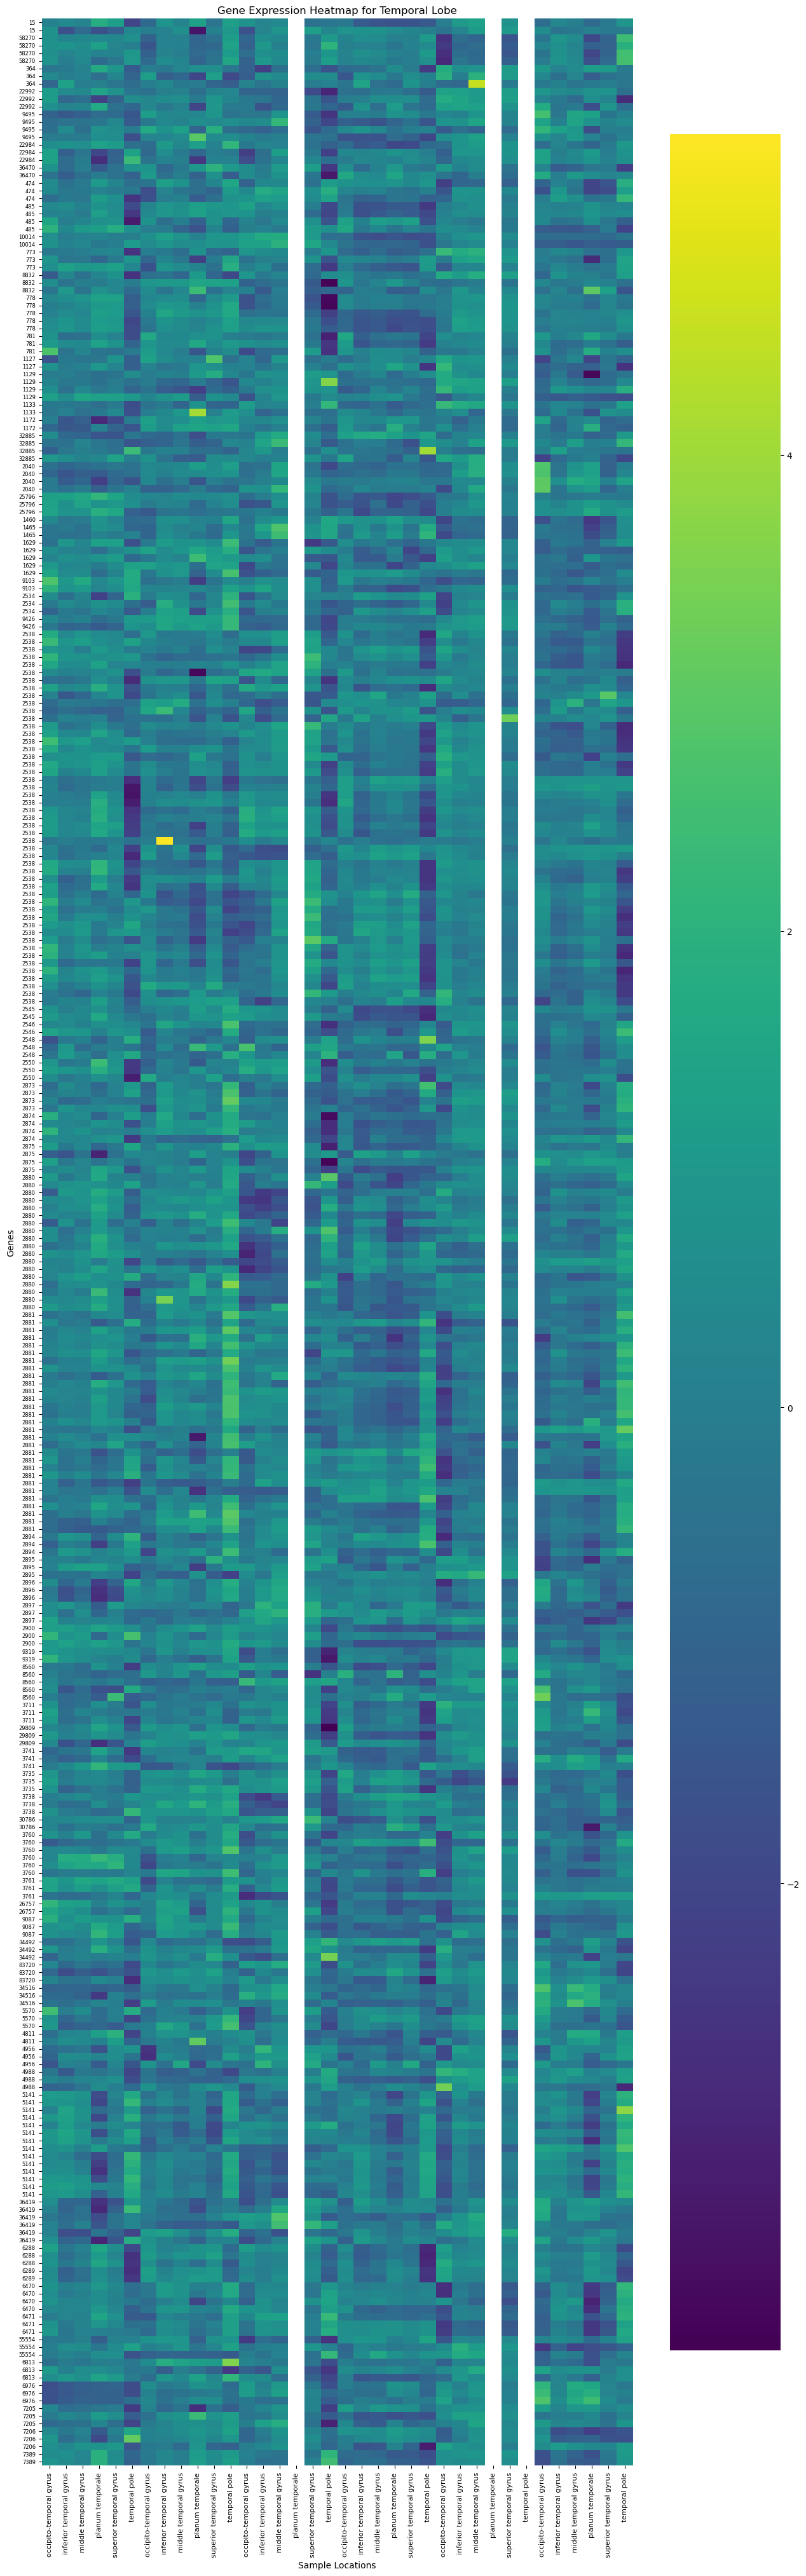

In [13]:
##The values in the heatmap represent normalized gene expression levels (z-scores), which indicate how much a gene's expression differs from its average across all samples.

##Interpretation of Positive & Negative Values:
#Positive values (> 0) → The gene is upregulated (higher expression than the mean in that sample).
#Negative values (< 0) → The gene is downregulated (lower expression than the mean in that sample).
#Near zero (~0) → The gene is expressed at an average level compared to other samples.


# Filter for temporal lobe samples
temporal_lobe_samples = columns_df[columns_df['structure_name'].str.contains("temporal", case=False, na=False)]
temporal_lobe_indices = temporal_lobe_samples.index

# Extract labels for each sample (only the structure name)
sample_labels = temporal_lobe_samples['structure_name']

# Match probe IDs in Expression.csv with gene IDs from Probes.csv
probe_gene_mapping = probes_df.set_index('id')['gene-id'].to_dict()
gene_labels = [probe_gene_mapping.get(probe, probe) for probe in expression_df.index]

# Subset expression data for temporal lobe samples
temporal_expression = expression_df.iloc[:, temporal_lobe_indices]

# Normalize the data (optional: standardize per row)
normalized_expression = (temporal_expression - temporal_expression.mean(axis=1).values[:, np.newaxis]) / temporal_expression.std(axis=1).values[:, np.newaxis]

# Plot heatmap with sample and gene labels
plt.figure(figsize=(15, 50))
sns.heatmap(normalized_expression, cmap="viridis", xticklabels=sample_labels, yticklabels=gene_labels)

# Improve readability by rotating labels
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=6)  # Smaller font for genes
plt.title("Gene Expression Heatmap for Temporal Lobe")
plt.xlabel("Sample Locations")
plt.ylabel("Genes ID")
plt.show()